In [24]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path

In [25]:
#create file path and read the CSV with pandas.
restaruantpath= Path("csv_folder/restaurant_data.csv")
restaruantfile=pd.read_csv(restaruantpath,encoding="UTF-8")
restaruantfile.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
1,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
2,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
3,40944945,Stage 42,Manhattan,422,WEST 42 STREET,10036.0,2125867610,American,09/24/2015,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.758823,-73.993607,104.0,3.0,11500.0,1087184.0,1.010518e+09,MN15,NaN
4,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN


In [26]:
#Insert columns we want to keep as a list object, then copy just those columns to a new dataframe.
restaurants_to_keep=['BORO', 'ZIPCODE','CUISINE DESCRIPTION','INSPECTION DATE','GRADE']
restaruantfile=restaruantfile[restaurants_to_keep].copy()
restaruantfile.head()

,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE
0,Brooklyn,11221.0,Other,09/24/2015,NaN
1,Brooklyn,11221.0,Other,09/24/2015,NaN
2,Brooklyn,11221.0,Other,09/24/2015,NaN
3,Manhattan,10036.0,American,09/24/2015,P
4,Brooklyn,11221.0,Other,09/24/2015,NaN


In [27]:
#drop Nans, fix formatting for date, change column name, fill nans of zipcode, and cast zip as integer to remove weird decimal.
clean_grade_df = restaruantfile.dropna(subset=['GRADE'])
clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
clean_grade_df['ZIPCODE'].fillna(0,inplace=True)
clean_grade_df['ZIPCODE'] = clean_grade_df['ZIPCODE'].astype(int)
clean_grade_df

C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_1948\1682527042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_1948\1682527042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_1948\1682527042.py:5: FutureWarning: A value is trying to be set on a copy of 

,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
3,Manhattan,10036,American,2015-09-24,P,2015-09-24
5,Manhattan,10036,American,2015-10-14,A,2015-10-14
6,Manhattan,10036,American,2015-10-14,A,2015-10-14
8,Manhattan,10036,American,2015-11-19,A,2015-11-19
9,Manhattan,10036,American,2015-11-19,A,2015-11-19
...,...,...,...,...,...,...
1393,Queens,11367,Other,2017-12-18,A,2017-12-18
1396,Queens,11367,Other,2017-12-18,A,2017-12-18
1403,Queens,11419,Caribbean,2017-12-21,A,2017-12-21
1409,Queens,11419,Caribbean,2017-12-21,A,2017-12-21


In [28]:
#getting unique value lists which should be helpful later when making calls. this syntax can work for any column.
clean_grade_df['CUISINE DESCRIPTION'].unique().tolist()
clean_grade_df['BORO'].unique().tolist()

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [46]:
#the code worked but i think we will have to run the dates through that filter code to get it sorted. I am holdingoff until class to do this.
clean_grade_df.sort_values('INSPECTION DATE',ascending=False)
clean_grade_df

,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
3,Manhattan,10036,American,2015-09-24,P,2015-09-24
5,Manhattan,10036,American,2015-10-14,A,2015-10-14
6,Manhattan,10036,American,2015-10-14,A,2015-10-14
8,Manhattan,10036,American,2015-11-19,A,2015-11-19
9,Manhattan,10036,American,2015-11-19,A,2015-11-19
...,...,...,...,...,...,...
1393,Queens,11367,Other,2017-12-18,A,2017-12-18
1396,Queens,11367,Other,2017-12-18,A,2017-12-18
1403,Queens,11419,Caribbean,2017-12-21,A,2017-12-21
1409,Queens,11419,Caribbean,2017-12-21,A,2017-12-21


BEGIN RAT DATA DO NOT PUT PIZZA DATA BELOW

In [30]:
#create filepath and read the CSV with pandas.
ratpath= Path("csv_folder/rat_sightings.csv")
ratfile=pd.read_csv(ratpath,encoding="UTF-8")
ratfile.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,9/4/2015 0:00,9/18/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,9/4/2015 0:00,10/28/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,9/4/2015 0:00,9/14/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [31]:
#came up with way to easily filter the main DF by columns. This can easily be amended by adding column titles to columns_to_keep and rerunning the block.
#i took facility type out Facililty Type because it is only Nans.
columns_to_keep=['Borough','Incident Zip','Created Date','Location Type','City','Status','Complaint Type']
clean_rats_df=ratfile[columns_to_keep].copy()
clean_rats_df

,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type
0,MANHATTAN,10006.0,9/4/2015 0:00,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent
1,STATEN ISLAND,10306.0,9/4/2015 0:00,Commercial Building,STATEN ISLAND,Closed,Rodent
2,STATEN ISLAND,10310.0,9/4/2015 0:00,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent
3,BROOKLYN,11206.0,9/4/2015 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
4,BRONX,10462.0,9/4/2015 0:00,3+ Family Mixed Use Building,BRONX,Closed,Rodent
...,...,...,...,...,...,...,...
101909,BROOKLYN,11207.0,2/15/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent
101910,BROOKLYN,11233.0,2/14/2017 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
101911,BROOKLYN,11213.0,2/14/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent
101912,QUEENS,11105.0,2/14/2017 0:00,1-2 Family Dwelling,Astoria,Pending,Rodent


In [32]:
#fixed the zip code formatting, had to fill NaNs but we can discuss dropping them maybe? Im having trouble picturing how it will effect the final project.
#next we need to run that code on the date here, i cant seem to locate it
clean_rats_df['Incident Zip'].fillna(-1,inplace=True)
clean_rats_df['Incident Zip'] = clean_rats_df['Incident Zip'].astype(int)
clean_rats_df['Created Date'] = pd.to_datetime(clean_rats_df['Created Date']).dt.date
clean_rats_df['Date']=clean_rats_df['Created Date']
clean_rats_df['ZIPCODE']=clean_rats_df['Incident Zip']
clean_rats_df

C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_1948\3369685304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_rats_df['Incident Zip'].fillna(-1,inplace=True)


,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type,Date,ZIPCODE
0,MANHATTAN,10006,2015-09-04,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent,2015-09-04,10006
1,STATEN ISLAND,10306,2015-09-04,Commercial Building,STATEN ISLAND,Closed,Rodent,2015-09-04,10306
2,STATEN ISLAND,10310,2015-09-04,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent,2015-09-04,10310
3,BROOKLYN,11206,2015-09-04,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2015-09-04,11206
4,BRONX,10462,2015-09-04,3+ Family Mixed Use Building,BRONX,Closed,Rodent,2015-09-04,10462
...,...,...,...,...,...,...,...,...,...
101909,BROOKLYN,11207,2017-02-15,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent,2017-02-15,11207
101910,BROOKLYN,11233,2017-02-14,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2017-02-14,11233
101911,BROOKLYN,11213,2017-02-14,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent,2017-02-14,11213
101912,QUEENS,11105,2017-02-14,1-2 Family Dwelling,Astoria,Pending,Rodent,2017-02-14,11105


In [33]:
#merged df on date. Might not use.
merged_df=pd.merge(clean_grade_df,clean_rats_df, on='Date')



In [34]:
#merged df on ZIPCODE. Again, probably wont use
zip_merge=pd.merge(clean_grade_df,clean_rats_df, on='ZIPCODE')

In [35]:
clean_rats_df.columns

Index(['Borough', 'Incident Zip', 'Created Date', 'Location Type', 'City',
       'Status', 'Complaint Type', 'Date', 'ZIPCODE'],
      dtype='object')

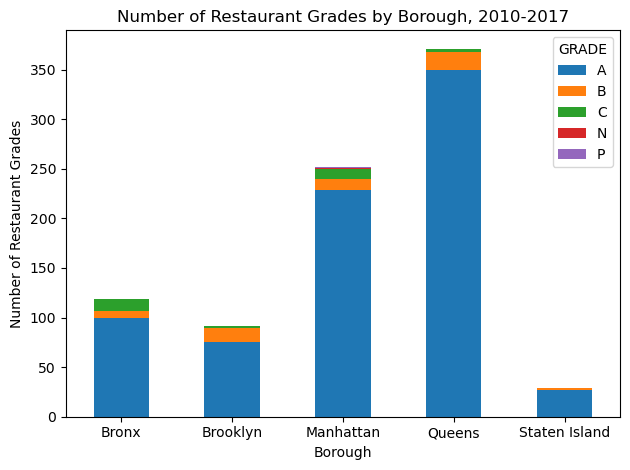

In [36]:
gradecounts= clean_grade_df.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

Boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [37]:
clean_rats_df['Complaint Type'].value_counts()

Complaint Type
Rodent    101914
Name: count, dtype: int64

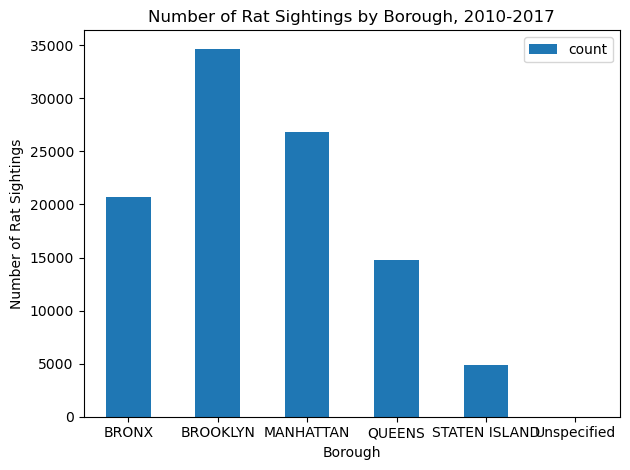

In [38]:
ratcounting=  clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

#ratboroughs = ratcounting['Borough']
#ratcounts = ratcounting.groupby('Borough').count()['Complaint Type']


#rattransposecounts = ratcounting.pivot(index='Borough', columns=ratboroughs, values=ratcounts).fillna(0)

ratcounting.plot(kind='bar', x='Borough', y='count')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings')
plt.title('Number of Rat Sightings by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [39]:
#consider per capita data. Find population and divide the rat sightings by the number of people.



In [40]:
borough_pops=pd.Series([{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}])
borough_pops

0           {'BRONX': 1471160}
1        {'BROOKLYN': 2736074}
2       {'MANHATTAN': 1694251}
3          {'QUEENS': 2405464}
4    {'STATEN ISLAND': 495747}
dtype: object

In [41]:
dict_lis=[{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}]

In [42]:
[dict_lis]

[[{'BRONX': 1471160},
  {'BROOKLYN': 2736074},
  {'MANHATTAN': 1694251},
  {'QUEENS': 2405464},
  {'STATEN ISLAND': 495747}]]

In [43]:
borough_count=clean_rats_df['Borough'].value_counts()
borough_count.pop('Unspecified')

1

In [44]:
borough_count['BROOKLYN']

34673

In [45]:
?pd.Series

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    